In [ ]:
# Import the pandas library for data manipulation
import pandas as pd

# Import the datasets module from scikit-learn to load built-in datasets
from sklearn import datasets

# Load the wine dataset from scikit-learn
wine = datasets.load_wine()

# Store the feature data (independent variables) in the variable x
x = wine.data  # `x` is a NumPy array containing the features for each sample

# Store the target labels (dependent variables) in the variable y
y = wine.target  # `y` is a NumPy array containing the class label for each sample


In [ ]:
# Create a DataFrame from the feature data (x) with column names from wine.feature_names
df_x = pd.DataFrame(x, columns=wine.feature_names)

# Create a Series from the target data (y) and name it 'target'
df_y = pd.Series(y, name='target')

# Combine the feature DataFrame (df_x) and the target Series (df_y) into a single DataFrame
df = pd.concat([df_x, df_y], axis=1)

# Display the first 5 rows of the DataFrame to inspect the data
print(df.head(10))


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Import the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    df_x,       # Feature data (independent variables)
    df_y,       # Target data (dependent variable)
    test_size=0.2,  # Proportion of the dataset to include in the test set (20%)
    random_state=42  # Ensures reproducibility by setting a random seed
)


In [ ]:
# Import the DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)  # random_state ensures reproducibility

# Train the decision tree model using the training dataset
model.fit(x_train, y_train)  # x_train: features, y_t


DecisionTreeClassifier(random_state=42)

In [ ]:
# Import the accuracy_score function from scikit-learn for evaluating model accuracy
from sklearn.metrics import accuracy_score

# Use the trained model to make predictions on the test set
y_pred = model.predict(x_test)  # Predict the target labels for the test set features

# Calculate the accuracy of the model by comparing predicted and actual target labels
accuracy = accuracy_score(y_test, y_pred)  # Returns the proportion of correct predictions

# Print the classification report (accuracy of the model)
print("Classification Report")
print(f"Accuracy: {accuracy * 100:.2f}%")  # Display accuracy as a percentage with 2 decimal places


Classification Report
Accuracy: 94.44%


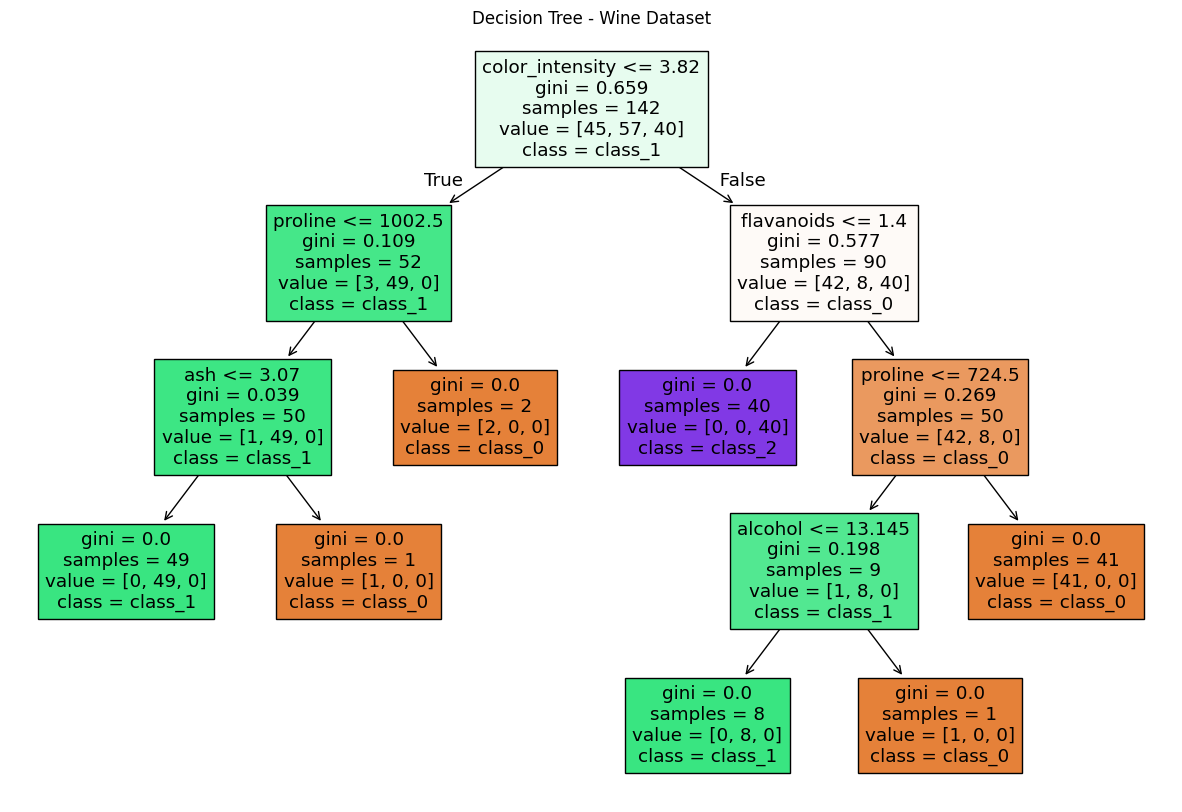

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import the tree module from scikit-learn for visualizing decision trees
from sklearn import tree

# Create a figure for the plot with specified dimensions
plt.figure(figsize=(15, 10))  # Width: 15, Height: 10

# Plot the decision tree
tree.plot_tree(
    model,  # The trained decision tree model
    feature_names=wine.feature_names,  # Correct spelling: Feature names from the dataset
    class_names=wine.target_names,  # Class names corresponding to the target labels
    filled=True  # Fill nodes with colors representing different classes
)

# Add a title to the plot
plt.title("Decision Tree - Wine Dataset")

# Display the plot
plt.show()
